In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
from IPython.display import display, HTML
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [49]:
def display_wide(df1, df2):
    display(HTML(
    f"""
    <div style="display: flex;">
        <div style="margin-right: 20px;">
            {df1.to_html()}
        </div>
        <div>
            {df2.to_html()}
        </div>
    </div>
    """
))

# 이상치를 포함한 수치형 데이터 생성

In [50]:
# Setting the random seed for reproducibility
np.random.seed(0)

# Creating 100 rows of data with 3 columns
data = {
    '상품명': np.random.choice(['가방', '신발', '티셔츠', '바지', '모자'], size=100),  # Column '상품명': Categorical data
    '가격': np.random.normal(loc=50000, scale=15000, size=100).astype(int),  # Column '가격': Normally distributed data as integers
    '판매량': np.random.normal(loc=100, scale=30, size=100).astype(int)  # Column '판매량': Normally distributed data as integers
}

# Introducing some extreme outliers
data['가격'][[5, 15, 50]] = [200000, 200001, 150000]
data['판매량'][[20, 70]] = [-50, 400]

# Creating a DataFrame
df = pd.DataFrame(data)
df.head()

,상품명,가격,판매량
0,모자,44534,72
1,가방,39818,144
2,바지,44695,105
3,바지,38888,85
4,바지,39874,154


# 초기데이터 기초 통계 확인

In [51]:
df.describe()

,가격,판매량
count,100.000000,100.000000
mean,54819.700000,97.090000
std,27579.832585,44.782774
min,20138.000000,-50.000000
25%,39860.000000,76.750000
50%,52065.500000,94.000000
75%,63799.250000,115.750000
max,200001.000000,400.000000


# 초기데이터 시각화

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '가격 히스토그램')

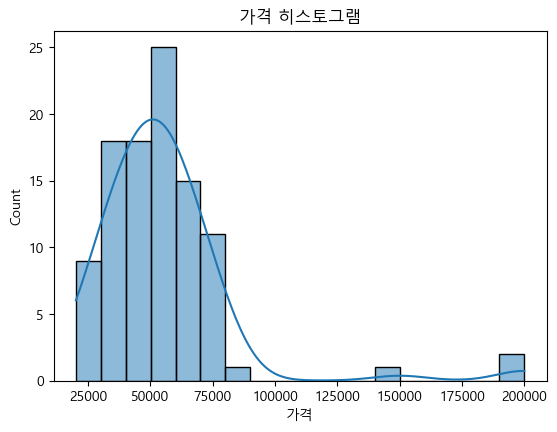

In [52]:
plt.figure(figsize=(14, 10))

# Histogram for '가격'
plt.subplot(2, 2, 1)
sns.histplot(df['가격'], kde=True)
plt.title('가격 히스토그램')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '판매량 히스토그램')

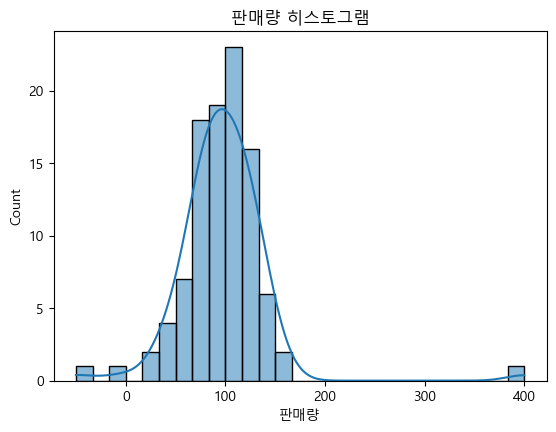

In [53]:
plt.figure(figsize=(14, 10))

# Histogram for '판매량'
plt.subplot(2, 2, 1)
sns.histplot(df['판매량'], kde=True)
plt.title('판매량 히스토그램')

# 이상치 식별

In [54]:
# Function to find outliers using Z-score
def find_outliers(df, threshold=3):
    numeric_df = df.select_dtypes(include=[np.number])
    z_scores = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
    outliers = (z_scores > threshold).any(axis=1)
    return df[outliers]

In [55]:
outliers_df = find_outliers(df)
outliers_df

,상품명,가격,판매량
5,신발,200000,31
15,신발,200001,118
20,바지,63878,-50
50,신발,150000,79
70,모자,55406,400


In [56]:
cleaned_df = df.drop(outliers_df.index)
find_outliers(cleaned_df)

,상품명,가격,판매량
65,신발,56527,-5


In [57]:
cleaned_df.drop(index=[65], inplace=True)
find_outliers(cleaned_df)

,상품명,가격,판매량


# 이상치 제거 후 기초통계 및 시각화 재확인

In [58]:
display

<function IPython.core.display_functions.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, raw=False, clear=False, **kwargs)>

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '가격 히스토그램')

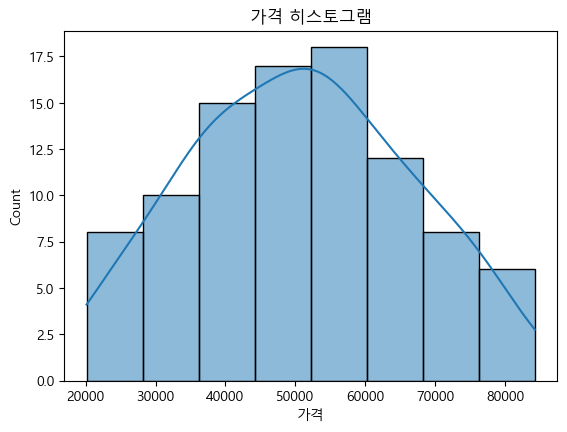

In [59]:
plt.figure(figsize=(14, 10))

# Histogram for '가격'
plt.subplot(2, 2, 1)
sns.histplot(cleaned_df['가격'], kde=True)
plt.title('가격 히스토그램')

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, '판매량 히스토그램')

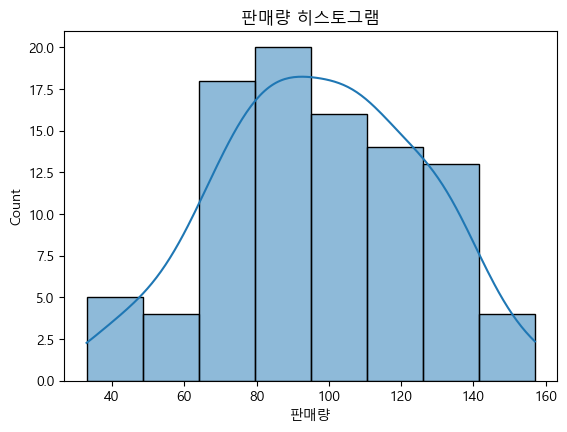

In [60]:
plt.figure(figsize=(14, 10))

# Histogram for '판매량'
plt.subplot(2, 2, 1)
sns.histplot(cleaned_df['판매량'], kde=True)
plt.title('판매량 히스토그램')

* 추후에도 이상치가 확인되면 삭제작업을 반복한다.